In [2]:
import os
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = dataset_train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set.shape


(1258, 1)

In [102]:
X_train = []
y_train = []

for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [103]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

X_train.shape

(1198, 60, 1)

In [2]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

regressor = Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

NameError: name 'X_train' is not defined

In [105]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 4s 38ms/step - loss: 0.0421
Epoch 2/100
38/38 [==============================] - 1s 34ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 1s 36ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0055
Epoch 7/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0046
Epoch 13/100
38/38 [=====

In [106]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
actual_stock_price = dataset_test.iloc[:,1:2].values

In [119]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs  = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)


X_test = []

for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
inputs.shape

(80, 1)

In [115]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
predicted_stock_price.shape

1/1 [==============================] - 0s 20ms/step


(20, 1)

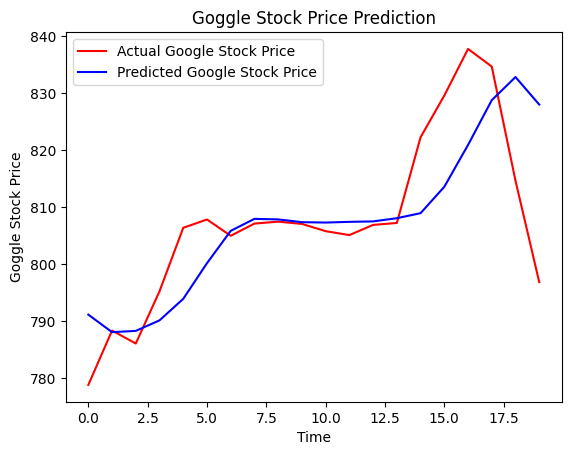

In [109]:
plt.plot(actual_stock_price,color = 'red',label='Actual Google Stock Price')
plt.plot(predicted_stock_price,color = 'blue',label='Predicted Google Stock Price')
plt.title('Goggle Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Goggle Stock Price')
plt.legend()


RMSE = 11.103072502938296
MAE  = 7.464352661132812


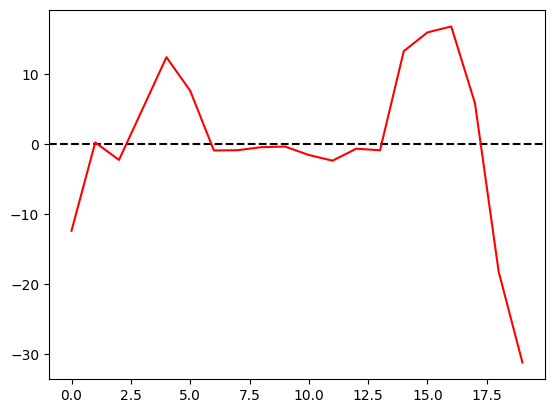

In [110]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

diff = actual_stock_price-predicted_stock_price

plt.axhline(y=0,color='black',linestyle='--')
plt.plot(diff,color = 'red')

mse = mean_squared_error(actual_stock_price, predicted_stock_price)
mae = mean_absolute_error(actual_stock_price, predicted_stock_price)
print(f"RMSE = {math.sqrt(mse)}")
print(f'MAE  = {mae}')